### TensorFlow Simple Model (Medical Cost Predict) 📊

In this notebook, we build a simple deep learning model using TensorFlow to predict medical costs based on the features provided in the `insurance.csv` dataset.

## 📚 Step 1: Importing Libraries
We'll start by importing the necessary libraries:

- **TensorFlow** for building the neural network model.
- **Pandas** for data manipulation and loading the dataset.
- **Matplotlib** and **NumPy** for visualizations and numerical operations.
- **Scikit-learn** for preprocessing, splitting data, and setting up a `ColumnTransformer`.


In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.utils import plot_model

In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
X = df.drop(['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## 🔄 Data Preprocessing with ColumnTransformer

In this section, we preprocess the data using `ColumnTransformer`:

- **OneHotEncoder**: Applied to categorical features (`sex`, `smoker`, `region`), with `drop='first'` to reduce redundancy.
- **MinMaxScaler**: Applied to numerical features (`age`, `bmi`, `children`) to scale them to a range between 0 and 1.

These preprocessing steps help the model learn more effectively by standardizing and encoding the input features. ⚙️


In [4]:
onehot = OneHotEncoder(drop='first')
normalizer = MinMaxScaler()

preprocess = ColumnTransformer(
    transformers=[
                     ('onehot', onehot, ['sex', 'smoker', 'region']),
                     ('normalizer', normalizer, ['age', 'bmi', 'children'])
                 ])

preprocess.fit(X_train)

ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['sex', 'smoker', 'region']),
                                ('normalizer', MinMaxScaler(),
                                 ['age', 'bmi', 'children'])])

In [5]:
X_train = preprocess.transform(X_train)
X_test = preprocess.transform(X_test) 

## 🧠 Building a Simple Deep Learning Model

In this section, we create a simple deep learning model to predict medical costs.

1. **Setting the Seed**: We set a random seed with `tf.random.set_seed(42)` to ensure reproducibility.
2. **Model Architecture**: A `Sequential` model with multiple Dense layers:
   - **First Layer**: 50 neurons
   - **Second Layer**: 100 neurons
   - **Third Layer**: 10 neurons
   - **Output Layer**: 1 neuron for the final prediction (medical cost)
3. **Compilation**: The model is compiled with Mean Absolute Error (MAE) as the loss function and the Adam optimizer.
4. **Model Summary and Plot**: We display a summary of the model and visualize its structure using `plot_model`.

This architecture provides a simple yet effective approach for regression tasks. 📊


Model: "simple_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,571 (25.67 KB)

 Trainable params: 6,571 (25.67 KB)

 Non-trainable params: 0 (0.00 B)

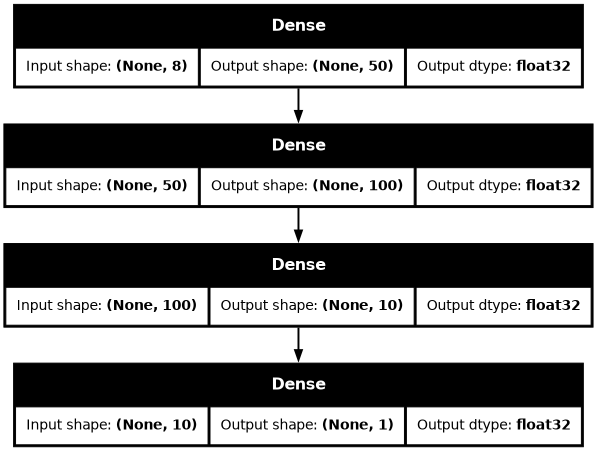

In [6]:
tf.random.set_seed(42)
model = tf.keras.Sequential(
    [
     tf.keras.layers.Input((X_train.shape[1],)),
     tf.keras.layers.Dense(50),
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
    , name="simple_model"
)

model.compile(loss=tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['mae'])

model.summary()
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=False, dpi=70)

In [7]:
history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [8]:
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3212.3262 - mae: 3212.3262  


[3157.77001953125, 3157.77001953125]

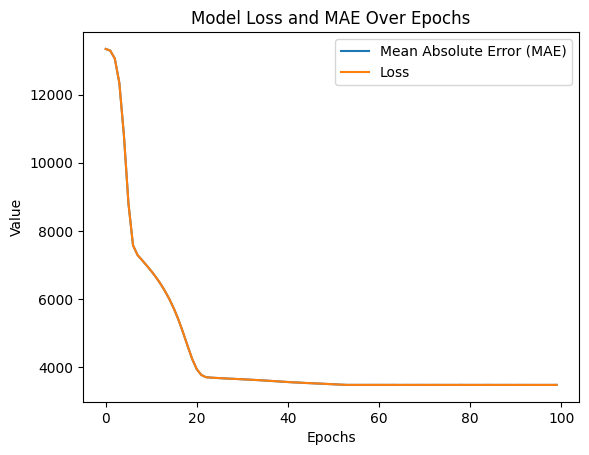

In [9]:
plt.plot(history.history['mae'], label='Mean Absolute Error (MAE)')
plt.plot(history.history['loss'], label='Loss')

plt.title("Model Loss and MAE Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()